In [248]:
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn import linear_model
import seaborn as sns

import numpy as np
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("train.csv")

      


def evaluate(X,Y,n):
    train_score=0
    test_score=0
    trainloss=0
    testloss=0
    
    
    for i in range(n):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)
        model = LinearRegression().fit(X_train,Y_train)
        train_score+=model.score(X_train,Y_train)
        test_score+=model.score(X_test,Y_test)
        Y_predtrain =model.predict(X_train)
        Y_predtest = model.predict(X_test)
        trainloss+=sklearn.metrics.mean_squared_error(Y_train, Y_predtrain)
        testloss+=sklearn.metrics.mean_squared_error(Y_test, Y_predtest)
    print(train_score/n)
    print(trainloss/n)
    print(test_score/n)
    print(testloss/n)

def ridgeeval(X,Y,n):
    print("Using Ridge:\n")
    train_score=0
    test_score=0
    trainloss=0
    testloss=0
    
    for i in range(n):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)
        rmodel = Ridge(alpha=2.0).fit(X_train,Y_train)
        train_score+=rmodel.score(X_train,Y_train)
        test_score+=rmodel.score(X_test,Y_test)
        Y_predtrain =rmodel.predict(X_train)
        Y_predtest = rmodel.predict(X_test)
        trainloss+=sklearn.metrics.mean_squared_error(Y_train, Y_predtrain)
        testloss+=sklearn.metrics.mean_squared_error(Y_test, Y_predtest)
    print(train_score/n)
    print(trainloss/n)
    print(test_score/n)
    print(testloss/n)
    
    
    

    
    





In [245]:
#outlier removal
chas=df['chas']
rad=df['rad']
tax=df['tax']
df=df.drop(['chas','ID','rad','tax'],axis=1)
df_new=df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 4).all(axis=1)]
df_new[['crim']]=df_new[['crim']].apply(np.log)
df_new.skew()
df_new.head()

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\frame.py:2378: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,crim,zn,indus,nox,rm,age,dis,ptratio,black,lstat,medv
0,-5.064036,18.0,2.31,0.538,6.575,65.2,4.0900,15.3,396.90,4.98,24.0
1,-3.600502,0.0,7.07,0.469,6.421,78.9,4.9671,17.8,396.90,9.14,21.6
2,-3.430523,0.0,2.18,0.458,6.998,45.8,6.0622,18.7,394.63,2.94,33.4
3,-2.672924,0.0,2.18,0.458,7.147,54.2,6.0622,18.7,396.90,5.33,36.2
4,-2.427128,12.5,7.87,0.524,6.012,66.6,5.5605,15.2,395.60,12.43,22.9


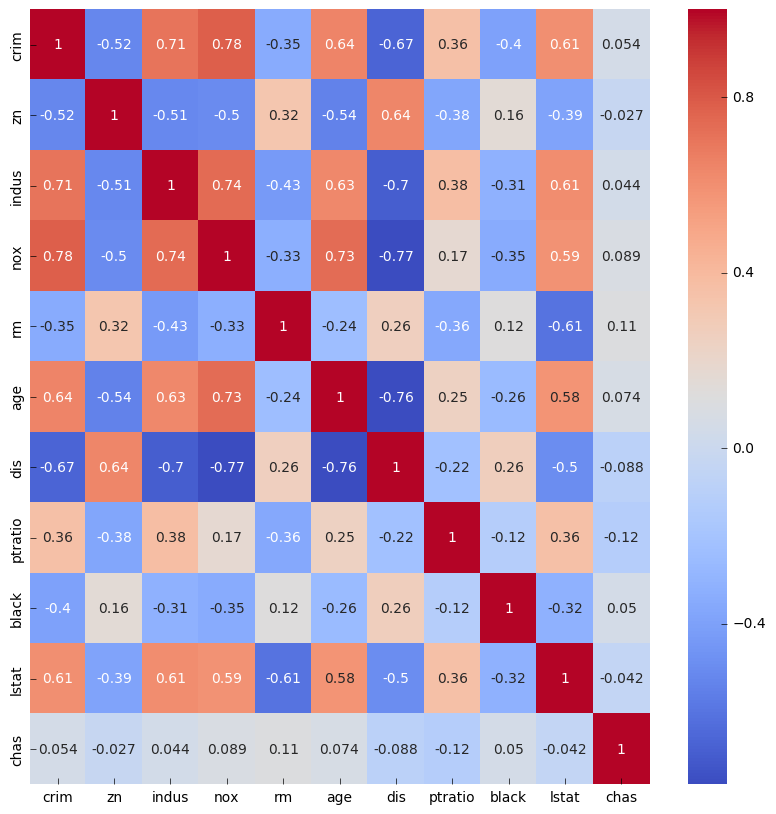

In [246]:

df_new = ((df_new - df_new.mean())/df_new.std())
df_new = (df_new - df_new.mean())/(df_new.max() - df_new.min())
#df_new=df_new**2
df_new['chas']=chas
df_new['rad']=rad
df_new['tax']=tax
X=df_new.drop(['medv','rad','tax'],axis=1)
Y=df_new['medv']
corr = X.corr()
plt.rcParams["figure.figsize"] = (10,10)
sns.heatmap(corr, cmap = "coolwarm", annot = True)




In [247]:
evaluate(X,Y,300)
ridgeeval(X,Y,300)

0.727200263683
0.0111887739857
0.672720839525
0.0133674390456
Using Ridge:

0.698071652238
0.0123125400079
0.65433761228
0.0144367986192


In [243]:
#Metrics after removing each feature individually
#for i in X.columns:
    #X0=X.drop([i],axis=1)
    #print("Removed:",i)
    #evaluate(X0,Y,300)
    #ridgeeval(X0,Y,300)
    #print('\n')
    
    
